In [1]:
%load_ext autoreload
%autoreload 2

Using backend: pytorch



	# 1. Generate train and test datasets



/Users/romainfouilland/.pyenv/versions/3.8.3/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


0it [00:00, ?it/s]

Generated graphs with   3 nodes are at 100.0% planar in average
Generated graphs with   4 nodes are at 100.0% planar in average
Generated graphs with   5 nodes are at  72.0% planar in average
Generated graphs with   6 nodes are at  64.0% planar in average
Generated graphs with   7 nodes are at  50.0% planar in average
Generated graphs with   8 nodes are at  64.0% planar in average
Generated graphs with   9 nodes are at  53.5% planar in average
Generated graphs with  10 nodes are at  46.5% planar in average
Generated graphs with  11 nodes are at  46.0% planar in average
Generated graphs with  12 nodes are at  40.5% planar in average
Generated graphs with  13 nodes are at  40.0% planar in average
Generated graphs with  14 nodes are at  26.0% planar in average
Generated graphs with  15 nodes are at  38.0% planar in average
Generated graphs are at  51.7% planar in average

	# 2. Train model



  0%|          | 0/1800 [00:00<?, ?it/s]

  0%|          | 0/1800 [00:00<?, ?it/s]

/Users/romainfouilland/.pyenv/versions/3.8.3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_splits=10, n_repeats=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Accuracy: 99.856% ± 0.311% for C=1000.0


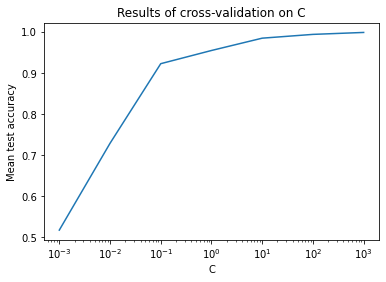

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=47),
             estimator=SVC(kernel='precomputed', random_state=76), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=weighted)})

	# 3. Smoke-test model

Skipped

	# 4. Investigate capabilities


	# 4. Investigate generalisation capabilities


	#   - Test set [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] nodes in numbers [500, 500, 500, 500, 500, 500, 500, 500, 300, 300, 300, 300, 300, 150, 150, 150, 100, 100]



  0%|          | 0/6150 [00:00<?, ?it/s]

  0%|          | 0/6150 [00:00<?, ?it/s]

dist1 loop:   0%|          | 0/6150 [00:00<?, ?it/s]

[[2694   12]
 [  20 3424]]
              precision    recall  f1-score   support

  Non-planar       0.99      1.00      0.99      2706
      Planar       1.00      0.99      1.00      3444

    accuracy                           0.99      6150
   macro avg       0.99      0.99      0.99      6150
weighted avg       0.99      0.99      0.99      6150


	### Score: 99.48% (f1-score for planar: 0.995 & non-planar: 0.994)
CPU times: user 2h 37min 20s, sys: 7min 18s, total: 2h 44min 38s
Wall time: 2h 47min 35s


In [2]:
%%time
from qplanarity import test_suite

times = [2.1, 1.6]
pulses = [0.2, 0.1]

generator = 'binomial'
metric = 'f1-score'
test_big=False
test_ramping_max_n = None

train_ns = range(3, 16)
train_nbs = 2 * [50] + 3 * [100] + 3 * [200] + 3 * [200] + 2 * [100]

test_ns = list(range(3, 21))
test_nbs = [500] * 8 + [300] * 5 + [150] * 3 + [100] * 2
all_results = test_suite(times, pulses, train_ns, train_nbs, generator, seed=21, metric=metric, 
                 test_ns=test_ns, test_nbs=test_nbs, test_smoke=False, test_big=test_big, test_ramping_max_n=test_ramping_max_n,
                return_all=True)

In [4]:
# Update with return_all to see how it scores for each + add histograms on nb trained for each nb od nodes & nb predicts (with 2 colors for planar & not + 2 colors for correct or not)

6150 6150 1800


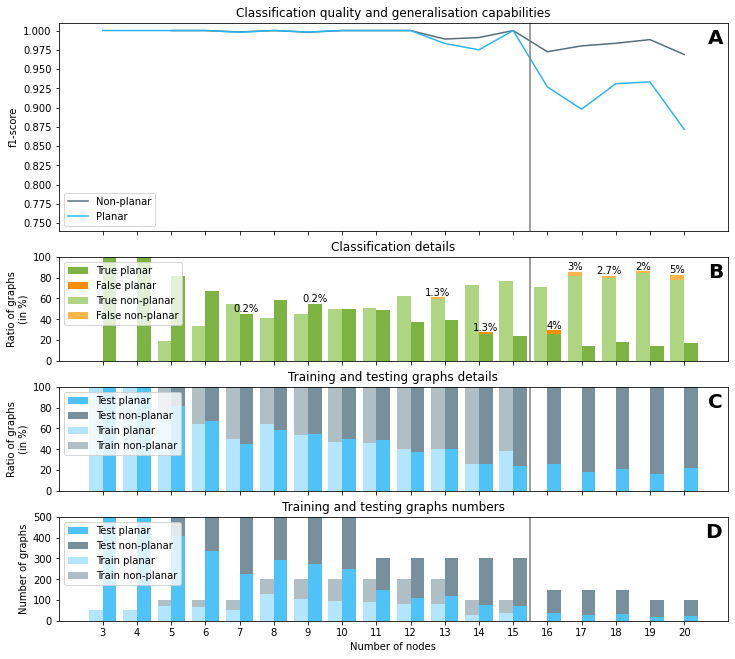

In [17]:
from qplanarity import results_graph
results_graph(all_results, train_nbs, train_ns, test_nbs, test_ns, '3->15=>20', generalization_x=15.5)